# Image Generation with Autoencoders

### What is an Autoencoder?

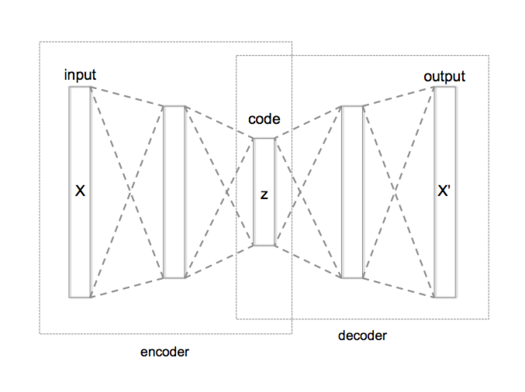

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). The encoding is validated and refined by attempting to regenerate the input from the encoding. The autoencoder learns a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore insignificant data (“noise”).

Variants exist, aiming to force the learned representations to assume useful properties. Examples are regularized autoencoders (Sparse, Denoising and Contractive), which are effective in learning representations for subsequent classification tasks, and Variational autoencoders, with applications as generative models. Autoencoders are applied to many problems, including facial recognition, feature detection, anomaly detection and acquiring the meaning of words. Autoencoders are also generative models which can randomly generate new data that is similar to the input data (training data).

### Autoencoder Types

#### Sparse

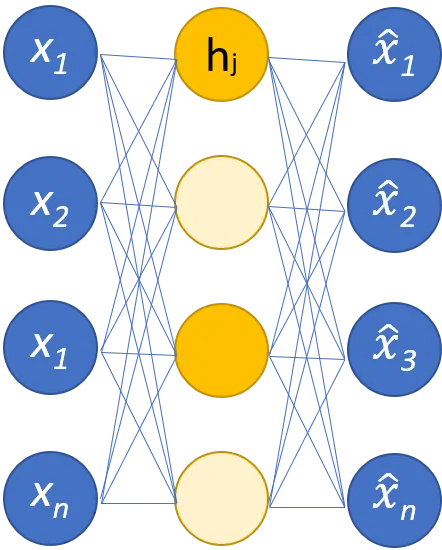

While autoencoders typically have a bottleneck that compresses the data through a reduction of nodes, sparse autoencoders are an alternative to that typical operational format. In a sparse network, the hidden layers maintain the same size as the encoder and decoder layers. Instead, the activations within a given layer are penalized, setting it up so the loss function better captures the statistical features of input data. To put that another way, while the hidden layers of a sparse autoencoder have more units than a traditional autoencoder, only a certain percentage of them are active at any given time. The most impactful activation functions are preserved and others are ignored, and this constraint helps the network determine just the most salient features of the input data.

#### Contractive

Contractive autoencoders are designed to be resilient against small variations in the data, maintaining a consistent representation of the data. This is accomplished by applying a penalty to the loss function. This regularization technique is based on the Frobenius norm of the Jacobian matrix for the input encoder activations. The effect of this regularization technique is that the model is forced to construct an encoding where similar inputs will have similar encodings.

#### Convolutional

Convolutional autoencoders encode input data by splitting the data up into subsections and then converting these subsections into simple signals that are summed together to create a new representation of the data. Similar to convolution neural networks,  a convolutional autoencoder specializes in the learning of image data, and it uses a filter that is moved across the entire image section by section. The encodings generated by the encoding layer can be used to reconstruct the image, reflect the image, or modify the image’s geometry. Once the filters have been learned by the network, they can be used on any sufficiently similar input to extract the features of the image.

#### Denoising

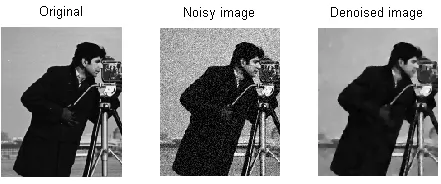

Denoising autoencoders introduce noise into the encoding, resulting in an encoding that is a corrupted version of the original input data. This corrupted version of the data is used to train the model, but the loss function compares the output values with the original input and not the corrupted input. The goal is that the network will be able to reproduce the original, non-corrupted version of the image. By comparing the corrupted data with the original data, the network learns which features of the data are most important and which features are unimportant/corruptions. In other words, in order for a model to denoise the corrupted images, it has to have extracted the important features of the image data.

#### Variational

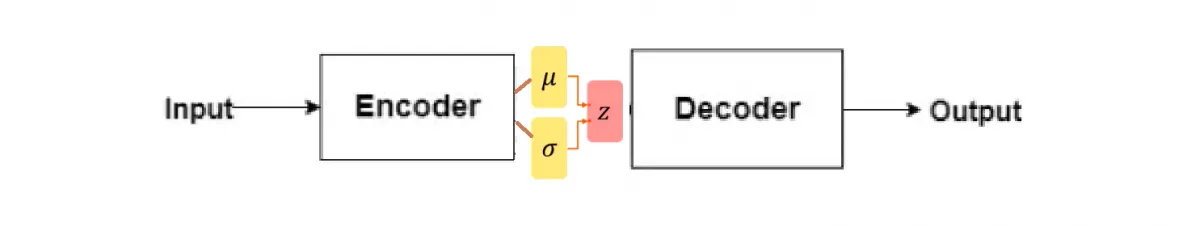

Variational autoencoders operate by making assumptions about how the latent variables of the data are distributed. A variational autoencoder produces a probability distribution for the different features of the training images/the latent attributes. When training, the encoder creates latent distributions for the different features of the input images.

Because the model learns the features or images as Gaussian distributions instead of discrete values, it is capable of being used to generate new images. The Gaussian distribution is sampled to create a vector, which is fed into the decoding network, which renders an image based on this vector of samples. Essentially, the model learns common features of the training images and assigns them some probability that they will occur. The probability distribution can then be used to reverse engineer an image, generating new images that resemble the original, training images.

When training the network, the encoded data is analyzed and the recognition model outputs two vectors, drawing out the mean and standard deviation of the images. A distribution is created based on these values. This is done for the different latent states. The decoder then takes random samples from the corresponding distribution and uses them to reconstruct the initial inputs to the network.

In [1]:
import numpy as np
import pandas as pd

from keras.models import Model
from keras.layers import *
from keras import backend as K

In [2]:
# tmnist data
df_train = pd.read_csv('94_character_TMNIST.csv')
X = df_train.iloc[:, 2:786]
print(X.shape)

(274093, 784)


In [3]:
train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
X_train = X_train.values.astype('float32')/255.
X_test = X_test.values.astype('float32')/255.
output_X_train = X_train.reshape(-1,28,28,1)
output_X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape, X_test.shape)

(219274, 784) (54819, 784)


In [4]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(32, activation = 'relu')(flat)

In [5]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
1714/1714 [==============================] - 61s 36ms/step - loss: 0.1813
Epoch 2/10
1714/1714 [==============================] - 60s 35ms/step - loss: 0.1452
Epoch 3/10
1714/1714 [==============================] - 58s 34ms/step - loss: 0.1500
Epoch 4/10
1714/1714 [==============================] - 58s 34ms/step - loss: 0.1284
Epoch 5/10
1714/1714 [==============================] - 57s 34ms/step - loss: 0.1312
Epoch 6/10
1714/1714 [==============================] - 57s 33ms/step - loss: 0.1274
Epoch 7/10
1714/1714 [==============================] - 57s 34ms/step - loss: 0.1222
Epoch 8/10
1714/1714 [==============================] - 57s 33ms/step - loss: 0.1196
Epoch 9/10
1714/1714 [==============================] - 58s 34ms/step - loss: 0.1210
Epoch 10/10
1714/1714 [==============================] - 58s 34ms/step - loss: 0.1215


In [6]:
test_imgs = autoencoder.predict(output_X_test)
print(test_imgs.shape)

(54819, 28, 28, 1)


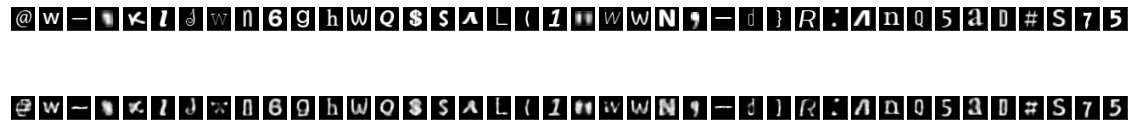

In [7]:
import matplotlib.pyplot as plt

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

After 10 epochs training, can simply get the performance of AE. Though there is some missing details, the shape of the image can be recognized.

As we know, the Autoencoder is made of two components, and it contains a quick reminder. The encoder gives the data from high dimensionals to a smallset neurons layer. The decoder takes the input generated by the encoder and convert them back into original shape. 

The latent space contains a compressed representation of the image, which is the only information the decoder is allowed to use to try to reconstruct the input as faithfullyas possible. To perform well, the network has to learn to extract the most relevant features in the bottleneck.


In [8]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(64, activation = 'relu')(flat)

In [9]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
1714/1714 [==============================] - 85s 49ms/step - loss: 0.1685
Epoch 2/10
1714/1714 [==============================] - 90s 52ms/step - loss: 0.1386
Epoch 3/10
1714/1714 [==============================] - 84s 49ms/step - loss: 0.1259
Epoch 4/10
1714/1714 [==============================] - 93s 54ms/step - loss: 0.1201
Epoch 5/10
1714/1714 [==============================] - 85s 49ms/step - loss: 0.1250
Epoch 6/10
1714/1714 [==============================] - 94s 55ms/step - loss: 0.1246
Epoch 7/10
1714/1714 [==============================] - 96s 56ms/step - loss: 0.1253
Epoch 8/10
1714/1714 [==============================] - 89s 52ms/step - loss: 0.1228
Epoch 9/10
1714/1714 [==============================] - 86s 50ms/step - loss: 0.1162
Epoch 10/10
1714/1714 [==============================] - 86s 50ms/step - loss: 0.1132


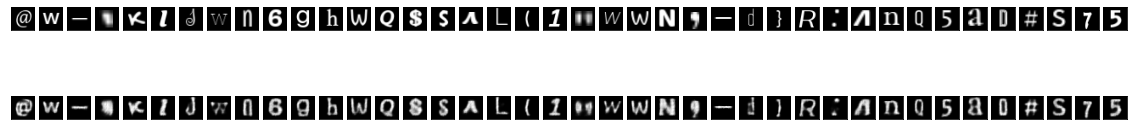

In [10]:
test_imgs = autoencoder.predict(output_X_test)

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
encoder_inputs = Input(shape = (28,28,1))
 
conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(encoder_inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)
conv2 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv2)
flat = Flatten()(pool2)
 
encoder_outputs = Dense(64, activation = 'relu')(flat)

In [12]:
#AE decoder
dense_layer_d = Dense(7*7*32, activation = 'relu')(encoder_outputs)
output_from_d = Reshape((7,7,32))(dense_layer_d)
conv1_1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(output_from_d)
upsampling_1 = Conv2DTranspose(64, 3, padding='same', activation='relu', strides=(2, 2))(conv1_1)
upsampling_2 = Conv2DTranspose(16, 3, padding='same', activation='relu', strides=(2, 2))(upsampling_1)
decoded_outputs = Conv2DTranspose(1, 3, padding='same', activation='relu')(upsampling_2)

#AE
autoencoder = Model(encoder_inputs, decoded_outputs)

m = 128
n_epoch = 10
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(output_X_train,output_X_train, epochs=n_epoch, batch_size=m, shuffle=True)

Epoch 1/10
1714/1714 [==============================] - 83s 48ms/step - loss: 0.1807
Epoch 2/10
1714/1714 [==============================] - 80s 47ms/step - loss: 0.1495
Epoch 3/10
1714/1714 [==============================] - 81s 47ms/step - loss: 0.1329
Epoch 4/10
1714/1714 [==============================] - 91s 53ms/step - loss: 0.1310
Epoch 5/10
1714/1714 [==============================] - 89s 52ms/step - loss: 0.1227
Epoch 6/10
1714/1714 [==============================] - 92s 53ms/step - loss: 0.1211
Epoch 7/10
1714/1714 [==============================] - 85s 50ms/step - loss: 0.1120
Epoch 8/10
1714/1714 [==============================] - 88s 51ms/step - loss: 0.1135
Epoch 9/10
1714/1714 [==============================] - 88s 51ms/step - loss: 0.1186
Epoch 10/10
1714/1714 [==============================] - 86s 50ms/step - loss: 0.1126


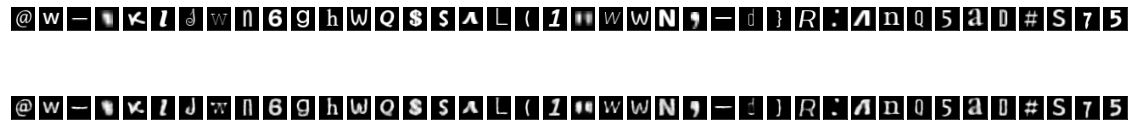

In [13]:
test_imgs = autoencoder.predict(output_X_test)

n = 40
plt.figure(figsize=(20, 3))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(output_X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

And then I change the pooling and sampling and get a better output, as we can see. The new set have more details than before. And it takes a longer time than before.

### Reference

[1] https://en.wikipedia.org/wiki/Autoencoder<br>
[2] https://www.unite.ai/what-is-an-autoencoder/#:~:text=Neural%20networks%20are%20composed%20of%20multiple,reconstructing%20it%20in%20an%20unsupervised%20fashion.&text=Neural%20networks%20are%20composed,in%20an%20unsupervised%20fashion.&text=are%20composed%20of%20multiple,reconstructing%20it%20in%20an<br>
[3] https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters<br>
[4] https://github.com/aiskunks/AI_Research/tree/main/dc-gan-best-practices
